In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
)
from sklearn.pipeline import Pipeline
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


Загрузка данных и первичный анализ

In [2]:
df1=pd.read_csv('data/S07-hw-dataset-01.csv')
df2=pd.read_csv('data/S07-hw-dataset-02.csv')
df3=pd.read_csv('data/S07-hw-dataset-03.csv')

In [3]:
def analyze_dataset(df):
    # 1. Основная информация о датафрейме
    print("\n1. ПЕРВЫЕ 5 СТРОК ДАННЫХ:")
    print(df.head())
    
    print("\n2. ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ:")
    print(df.info())
    
    # 3. Базовые статистики
    print("\n3. БАЗОВЫЕ СТАТИСТИКИ (describe):")
    print(df.describe())
    
    # 4. Проверка пропусков
    print("\n4. АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ:")
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({
        'Количество пропусков': missing_values,
        'Доля пропусков (%)': missing_percentage
    })
    if missing_df['Количество пропусков'].sum() == 0:
        print('Количество пропусков: 0')
        print('Доля пропусков (%): 0')
    else:
        print(missing_df)
        
    # 5. Типы признаков
    print("\n5. ТИПЫ ПРИЗНАКОВ:")
    feature_types = {}
    for col in df.columns:
        dtype = str(df[col].dtype)
        if 'int' in dtype or 'float' in dtype:
            feature_types[col] = 'Числовой'
        else:
            feature_types[col] = 'Категориальный/Строковый'
    
    type_df = pd.DataFrame({
        'Тип данных': df.dtypes,
        'Категория': feature_types.values()
    })
    print(type_df)
    
    # 6. Выделение признаков и sample_id
    print("\n6. ВЫДЕЛЕНИЕ ПРИЗНАКОВ И sample_id:")
    if 'sample_id' in df.columns:
        sample_id = df['sample_id']
        X = df.drop('sample_id', axis=1)
        print(f"sample_id сохранен отдельно, {len(sample_id)} записей")
        print(f"Признаки X: {X.shape[1]} столбцов")
        print(f"Столбцы X: {list(X.columns)}")
    else:
        X = df.copy()
        sample_id = None
        print("Столбец sample_id не найден в данных")
        print(f"Признаки X: все столбцы, {X.shape[1]} штук")
        print(f"Столбцы X: {list(X.columns)}")
    

In [4]:
analyze_dataset(df1)


1. ПЕРВЫЕ 5 СТРОК ДАННЫХ:
   sample_id        f01        f02       f03         f04        f05  \
0          0  -0.536647 -69.812900 -0.002657   71.743147 -11.396498   
1          1  15.230731  52.727216 -1.273634 -104.123302  11.589643   
2          2  18.542693  77.317150 -1.321686 -111.946636  10.254346   
3          3 -12.538905 -41.709458  0.146474   16.322124   1.391137   
4          4  -6.903056  61.833444 -0.022466  -42.631335   3.107154   

         f06        f07       f08  
0 -12.291287  -6.836847 -0.504094  
1  34.316967 -49.468873  0.390356  
2  25.892951  44.595250  0.325893  
3   2.014316 -39.930582  0.139297  
4  -5.471054   7.001149  0.131213  

2. ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  f

In [5]:
analyze_dataset(df2)


1. ПЕРВЫЕ 5 СТРОК ДАННЫХ:
   sample_id        x1        x2    z_noise
0          0  0.098849 -1.846034  21.288122
1          1 -1.024516  1.829616   6.072952
2          2 -1.094178 -0.158545 -18.938342
3          3 -1.612808 -1.565844 -11.629462
4          4  1.659901 -2.133292   1.895472

2. ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB
None

3. БАЗОВЫЕ СТАТИСТИКИ (describe):
        sample_id           x1           x2      z_noise
count  8000.00000  8000.000000  8000.000000  8000.000000
mean   3999.50000     0.478867     0.241112     0.110454
std    2309.54541     0.955138     0.663195     8.097716
min       0.00

In [6]:
analyze_dataset(df3)


1. ПЕРВЫЕ 5 СТРОК ДАННЫХ:
   sample_id        x1        x2    f_corr   f_noise
0          0 -2.710470  4.997107 -1.015703  0.718508
1          1  8.730238 -8.787416  3.953063 -1.105349
2          2 -1.079600 -2.558708  0.976628 -3.605776
3          3  6.854042  1.560181  1.760614 -1.230946
4          4  9.963812 -8.869921  2.966583  0.915899

2. ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB
None

3. БАЗОВЫЕ СТАТИСТИКИ (describe):
          sample_id            x1            x2        f_corr       f_noise
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.0

Предпроцессинг

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def create_preprocessing_pipeline(df):
    # 1. Выделение sample_id и признаков X
    if 'sample_id' in df.columns:
        sample_id = df['sample_id']
        X = df.drop('sample_id', axis=1)
    else:
        sample_id = None
        X = df.copy()
    
    # 2. Определение типов признаков
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
    
    # 3. Создание трансформеров
    transformers = []
    
    # Для числовых признаков
    if numeric_features:
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])
        transformers.append(('num', numeric_transformer, numeric_features))
    
    # Для категориальных признаков
    if categorical_features:
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ])
        transformers.append(('cat', categorical_transformer, categorical_features))
    
    # 4. Создание ColumnTransformer и Pipeline
    column_transformer = ColumnTransformer(
        transformers=transformers,
        remainder='drop'
    )
    
    preprocessing_pipeline = Pipeline(steps=[
        ('preprocessor', column_transformer)
    ])
    
    # 5. Применение препроцессинга
    X_processed = preprocessing_pipeline.fit_transform(X)
    
    return preprocessing_pipeline, X_processed, sample_id

In [8]:

# Создание и применение препроцессинга
pipeline1, X1, sample_id1 = create_preprocessing_pipeline(df1)
print(f"  Исходные признаки: {df1.shape[1] - (1 if 'sample_id' in df1.columns else 0)}")
print(f"  После обработки: {X1.shape[1]} признаков")
print(f"  Тип данных: {type(X1).__name__}")
print(f"  Форма: {X1.shape}")

# Проверка масштабирования
if X1.shape[1] > 0:
    print(f"  Проверка StandardScaler:")
    print(f"    Среднее: {X1.mean():.4f}")
    print(f"    Стандартное отклонение: {X1.std():.4f}")

  Исходные признаки: 8
  После обработки: 8 признаков
  Тип данных: ndarray
  Форма: (12000, 8)
  Проверка StandardScaler:
    Среднее: -0.0000
    Стандартное отклонение: 1.0000


In [9]:
pipeline2, X2, sample_id2 = create_preprocessing_pipeline(df2)
 # Вывод информации о препроцессинге
print(f"  Исходные признаки: {df2.shape[1] - (1 if 'sample_id' in df2.columns else 0)}")
print(f"  После обработки: {X2.shape[1]} признаков")
print(f"  Тип данных: {type(X2).__name__}")
print(f"  Форма: {X2.shape}")

# Проверка масштабирования
if X2.shape[1] > 0:
    print(f"  Проверка StandardScaler:")
    print(f"    Среднее: {X2.mean():.4f}")
    print(f"    Стандартное отклонение: {X2.std():.4f}")

  Исходные признаки: 3
  После обработки: 3 признаков
  Тип данных: ndarray
  Форма: (8000, 3)
  Проверка StandardScaler:
    Среднее: 0.0000
    Стандартное отклонение: 1.0000


In [10]:
pipeline3, X3, sample_id3 = create_preprocessing_pipeline(df3)
print(f"  Исходные признаки: {df3.shape[1] - (1 if 'sample_id' in df3.columns else 0)}")
print(f"  После обработки: {X3.shape[1]} признаков")
print(f"  Тип данных: {type(X3).__name__}")
print(f"  Форма: {X3.shape}")

# Проверка масштабирования
if X3.shape[1] > 0:
    print(f"  Проверка StandardScaler:")
    print(f"    Среднее: {X3.mean():.4f}")
    print(f"    Стандартное отклонение: {X3.std():.4f}")

  Исходные признаки: 4
  После обработки: 4 признаков
  Тип данных: ndarray
  Форма: (15000, 4)
  Проверка StandardScaler:
    Среднее: -0.0000
    Стандартное отклонение: 1.0000


Модели недели 7

Настройка эксперимента


In [11]:

# Настройки PCA: None (не использовать) или число компонент (например, 30)
pca_dim = 30

# Диапазон K для KMeans
kmeans_ks = list(range(2, 21))

# Сетка для DBSCAN: eps и min_samples
# eps зависит от масштаба данных – после scaling обычно eps ~ 0.5..5 (но это очень примерно).
# Универсальные настройки для всех датасетов
dbscan_eps = [0.3, 0.4, 0.5, 0.7, 1.0, 1.5, 2.0]
dbscan_min_samples = [3, 5, 10, 15]

# Agglomerative: число кластеров и linkage (для sklearn Agglomerative: 'ward' требует euclidean)
agg_ks = list(range(2, 21))
agg_linkages = ["ward", "complete", "average"]

print("Config:")
print(" pca_dim:", pca_dim)
print(" kmeans_ks:", (kmeans_ks[0], "...", kmeans_ks[-1]))
print(" dbscan eps:", dbscan_eps)
print(" dbscan min_samples:", dbscan_min_samples)
print(" agg ks:", (agg_ks[0], "...", agg_ks[-1]))
print(" agg linkages:", agg_linkages)


Config:
 pca_dim: 30
 kmeans_ks: (2, '...', 20)
 dbscan eps: [0.3, 0.4, 0.5, 0.7, 1.0, 1.5, 2.0]
 dbscan min_samples: [3, 5, 10, 15]
 agg ks: (2, '...', 20)
 agg linkages: ['ward', 'complete', 'average']


In [12]:
def safe_cluster_metrics(X, labels):
    """Считает метрики; возвращает None, если метрика неприменима."""
    unique = np.unique(labels)
    # Нужно минимум 2 кластера
    if len(unique) < 2:
        return None

    # Нельзя, чтобы все точки были в одном кластере
    if len(unique) == 1:
        return None

    # silhouette требует, чтобы все кластеры имели >1 точки (часто, но не всегда)
    # В sklearn silhouette_score может падать, если какой-то кластер пуст/особый.
    try:
        sil = float(silhouette_score(X, labels))
    except Exception:
        sil = None

    try:
        db = float(davies_bouldin_score(X, labels))
    except Exception:
        db = None

    try:
        ch = float(calinski_harabasz_score(X, labels))
    except Exception:
        ch = None

    return {"silhouette": sil, "davies_bouldin": db, "calinski_harabasz": ch}

def pca_2d_for_plot(X_scaled, random_state=RANDOM_STATE):
    """PCA(2D) именно для визуализации."""
    p = PCA(n_components=2, random_state=random_state)
    return p.fit_transform(X_scaled)

def plot_2d_embedding(emb2d, labels, title):
    plt.figure(figsize=(7, 5))
    plt.scatter(emb2d[:, 0], emb2d[:, 1], c=labels, s=18)
    plt.title(title)
    plt.xlabel("dim-1")
    plt.ylabel("dim-2")
    plt.grid(True, alpha=0.2)
    plt.show()

def summarize_labels(labels):
    unique, counts = np.unique(labels, return_counts=True)
    return dict(zip(unique.tolist(), counts.tolist()))


KMeans

In [13]:
def eval_kmeans_grid(X_feat, ks):
    results = []
    for k in ks:
        try:
            model = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init="auto")
        except TypeError:
            model = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)

        labels = model.fit_predict(X_feat)
        metrics = safe_cluster_metrics(X_feat, labels)

        results.append({
            "algo": "kmeans",
            "params": {"k": k},
            "labels": labels,
            "metrics": metrics,
            "inertia": float(model.inertia_),
            "n_clusters": len(np.unique(labels)),
            "noise_frac": 0.0,
        })
    return results



In [14]:
kmeans_results1 = eval_kmeans_grid(X1, kmeans_ks)
len(kmeans_results1), kmeans_results1[0]["params"], kmeans_results1[-1]["params"]

(19, {'k': 2}, {'k': 20})

In [15]:
kmeans_results2 = eval_kmeans_grid(X2, kmeans_ks)
len(kmeans_results2), kmeans_results2[0]["params"], kmeans_results2[-1]["params"]

(19, {'k': 2}, {'k': 20})

In [16]:
kmeans_results3 = eval_kmeans_grid(X3, kmeans_ks)
len(kmeans_results3), kmeans_results3[0]["params"], kmeans_results3[-1]["params"]

(19, {'k': 2}, {'k': 20})

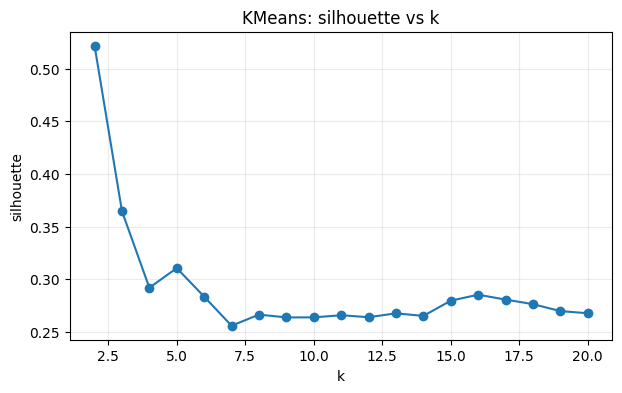

<Figure size 640x480 with 0 Axes>

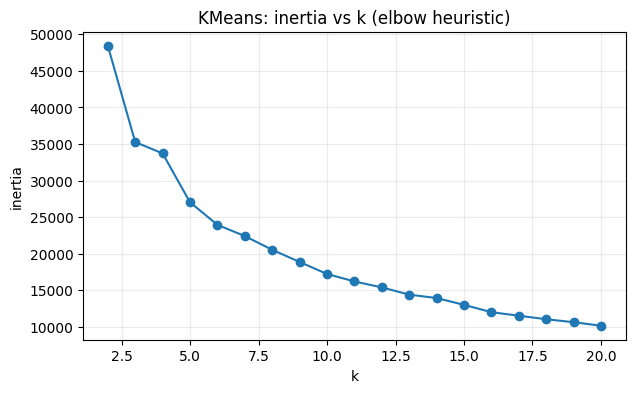

In [17]:
# Быстрый график silhouette по k (если silhouette считалась)
ks = [r["params"]["k"] for r in kmeans_results1]
sil = [r["metrics"]["silhouette"] if r["metrics"] else None for r in kmeans_results1]

plt.figure(figsize=(7, 4))
plt.plot(ks, sil, marker="o")
plt.title("KMeans: silhouette vs k")
plt.xlabel("k")
plt.ylabel("silhouette")
plt.grid(True, alpha=0.25)
plt.show()
plt.savefig('artifacts/figures/dataset1_silhouette_vs_k.png', 
            dpi=100, bbox_inches='tight')
# Инерция (elbow) – как эвристика
inertia = [r["inertia"] for r in kmeans_results1]
plt.figure(figsize=(7, 4))
plt.plot(ks, inertia, marker="o")
plt.title("KMeans: inertia vs k (elbow heuristic)")
plt.xlabel("k")
plt.ylabel("inertia")
plt.grid(True, alpha=0.25)
# Сохраняем график
plt.savefig('artifacts/figures/dataset1_inertia_elbow.png', 
            dpi=100, bbox_inches='tight')
plt.show()

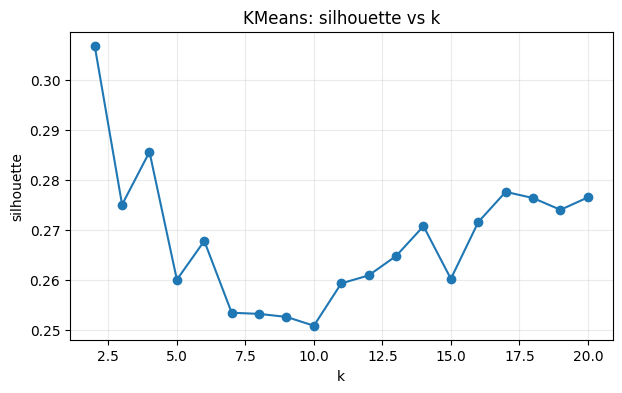

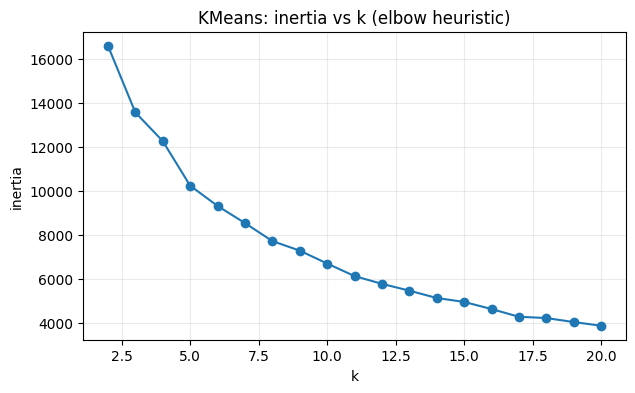

In [18]:

# Быстрый график silhouette по k (если silhouette считалась)
ks = [r["params"]["k"] for r in kmeans_results2]
sil = [r["metrics"]["silhouette"] if r["metrics"] else None for r in kmeans_results2]

plt.figure(figsize=(7, 4))
plt.plot(ks, sil, marker="o")
plt.title("KMeans: silhouette vs k")
plt.xlabel("k")
plt.ylabel("silhouette")
plt.grid(True, alpha=0.25)
plt.savefig('artifacts/figures/dataset2_silhouette_vs_k.png', 
            dpi=100, bbox_inches='tight')
plt.show()

# Инерция (elbow) – как эвристика
inertia = [r["inertia"] for r in kmeans_results2]
plt.figure(figsize=(7, 4))
plt.plot(ks, inertia, marker="o")
plt.title("KMeans: inertia vs k (elbow heuristic)")
plt.xlabel("k")
plt.ylabel("inertia")
plt.grid(True, alpha=0.25)
plt.savefig('artifacts/figures/dataset2_inertia_elbow.png', 
            dpi=100, bbox_inches='tight')
plt.show()

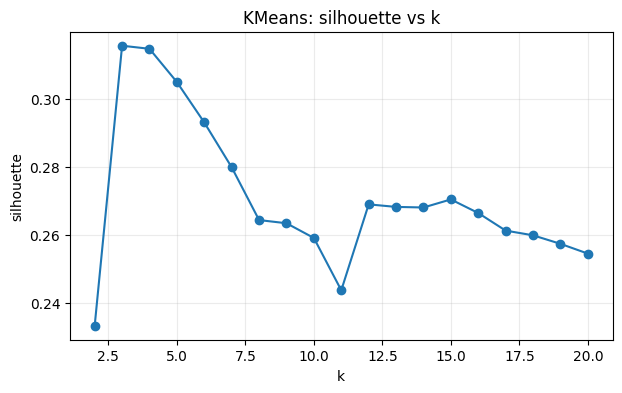

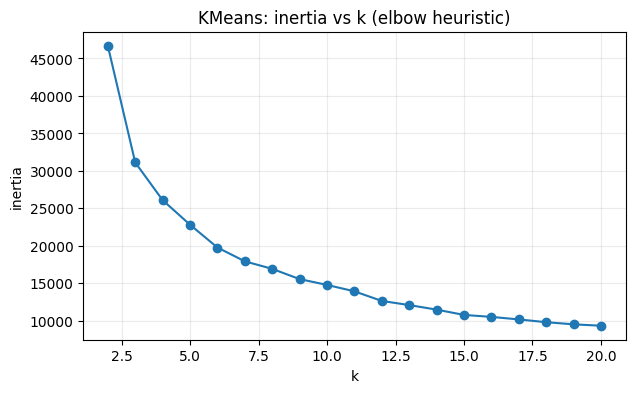

In [19]:

# Быстрый график silhouette по k (если silhouette считалась)
ks = [r["params"]["k"] for r in kmeans_results3]
sil = [r["metrics"]["silhouette"] if r["metrics"] else None for r in kmeans_results3]

plt.figure(figsize=(7, 4))
plt.plot(ks, sil, marker="o")
plt.title("KMeans: silhouette vs k")
plt.xlabel("k")
plt.ylabel("silhouette")
plt.grid(True, alpha=0.25)
plt.savefig('artifacts/figures/dataset3_silhouette_vs_k.png', 
            dpi=100, bbox_inches='tight')
plt.show()

# Инерция (elbow) – как эвристика
inertia = [r["inertia"] for r in kmeans_results3]
plt.figure(figsize=(7, 4))
plt.plot(ks, inertia, marker="o")
plt.title("KMeans: inertia vs k (elbow heuristic)")
plt.xlabel("k")
plt.ylabel("inertia")
plt.grid(True, alpha=0.25)
plt.savefig('artifacts/figures/dataset3_inertia_elbow.png', 
            dpi=100, bbox_inches='tight')
plt.show()

In [20]:

def pick_best_by_silhouette(results):
    best = None
    best_score = -np.inf
    for r in results:
        m = r["metrics"]
        if m is None:
            continue
        s = m["silhouette"]
        if s is None:
            continue
        if s > best_score:
            best_score = s
            best = r
    return best, best_score


In [21]:

best_kmeans1, best_kmeans_s1 = pick_best_by_silhouette(kmeans_results1)
best_kmeans1["params"], round(best_kmeans_s1, 3)

({'k': 2}, 0.522)

In [22]:
best_kmeans2, best_kmeans_s2 = pick_best_by_silhouette(kmeans_results2)
best_kmeans2["params"], round(best_kmeans_s2, 3)

({'k': 2}, 0.307)

In [23]:

best_kmeans3, best_kmeans_s3 = pick_best_by_silhouette(kmeans_results3)
best_kmeans3["params"], round(best_kmeans_s3, 3)

({'k': 3}, 0.316)

DBSCAN

In [24]:
def eval_dbscan_grid(X_feat, eps_list, min_samples_list):
    results = []
    n = len(X_feat)

    for eps in eps_list:
        for ms in min_samples_list:
            model = DBSCAN(eps=eps, min_samples=ms)
            labels = model.fit_predict(X_feat)

            noise_frac = float(np.mean(labels == -1))
            # Метрики по non-noise
            mask = labels != -1
            labels_nn = labels[mask]
            X_nn = X_feat[mask]

            # Перенумеруем метки non-noise, чтобы метрики работали корректнее (не обязательно, но аккуратно)
            if len(labels_nn) > 0:
                uniq = np.unique(labels_nn)
                mapping = {u: i for i, u in enumerate(uniq)}
                labels_nn = np.array([mapping[v] for v in labels_nn], dtype=int)

            metrics = None
            n_clusters = 0
            if len(X_nn) >= 10 and len(np.unique(labels_nn)) >= 2:
                metrics = safe_cluster_metrics(X_nn, labels_nn)
                n_clusters = len(np.unique(labels_nn))

            results.append({
                "algo": "dbscan",
                "params": {"eps": float(eps), "min_samples": int(ms)},
                "labels": labels,
                "metrics": metrics,
                "inertia": None,
                "n_clusters": int(n_clusters),
                "noise_frac": float(noise_frac),
                "n_non_noise": int(mask.sum()),
            })
    return results



In [25]:
dbscan_results1 = eval_dbscan_grid(X1, dbscan_eps, dbscan_min_samples)
len(dbscan_results1)

28

In [26]:
dbscan_results2 = eval_dbscan_grid(X2, dbscan_eps, dbscan_min_samples)
len(dbscan_results2)

28

In [27]:
dbscan_results3 = eval_dbscan_grid(X3, dbscan_eps, dbscan_min_samples)
len(dbscan_results3)

28

In [28]:
# Посмотрим, какие варианты вообще дали >=2 кластера (без шума) и посчитали silhouette
valid1 = [r for r in dbscan_results1 if r["metrics"] is not None and r["metrics"]["silhouette"] is not None]
print("Valid DBSCAN configs:", len(valid1))

# Сортировка по silhouette
valid_sorted1 = sorted(valid1, key=lambda r: r["metrics"]["silhouette"], reverse=True)
for r in valid_sorted1[:8]:
    print(r["params"], "sil=", round(r["metrics"]["silhouette"], 3), "noise=", round(r["noise_frac"], 3), "clusters=", r["n_clusters"])

     

Valid DBSCAN configs: 28
{'eps': 2.0, 'min_samples': 3} sil= 0.522 noise= 0.0 clusters= 2
{'eps': 2.0, 'min_samples': 5} sil= 0.522 noise= 0.0 clusters= 2
{'eps': 2.0, 'min_samples': 10} sil= 0.522 noise= 0.0 clusters= 2
{'eps': 2.0, 'min_samples': 15} sil= 0.522 noise= 0.0 clusters= 2
{'eps': 0.5, 'min_samples': 15} sil= 0.399 noise= 0.092 clusters= 5
{'eps': 1.5, 'min_samples': 3} sil= 0.397 noise= 0.0 clusters= 3
{'eps': 1.5, 'min_samples': 5} sil= 0.397 noise= 0.0 clusters= 3
{'eps': 1.5, 'min_samples': 10} sil= 0.397 noise= 0.0 clusters= 3


In [29]:
# Посмотрим, какие варианты вообще дали >=2 кластера (без шума) и посчитали silhouette
valid2 = [r for r in dbscan_results2 if r["metrics"] is not None and r["metrics"]["silhouette"] is not None]
print("Valid DBSCAN configs:", len(valid2))

# Сортировка по silhouette
valid_sorted2 = sorted(valid2, key=lambda r: r["metrics"]["silhouette"], reverse=True)
for r in valid_sorted2[:8]:
    print(r["params"], "sil=", round(r["metrics"]["silhouette"], 3), "noise=", round(r["noise_frac"], 3), "clusters=", r["n_clusters"])    

Valid DBSCAN configs: 10
{'eps': 0.7, 'min_samples': 15} sil= 0.349 noise= 0.051 clusters= 2
{'eps': 0.7, 'min_samples': 3} sil= 0.346 noise= 0.007 clusters= 2
{'eps': 0.7, 'min_samples': 10} sil= 0.305 noise= 0.036 clusters= 5
{'eps': 0.5, 'min_samples': 10} sil= 0.251 noise= 0.064 clusters= 2
{'eps': 0.4, 'min_samples': 5} sil= 0.135 noise= 0.062 clusters= 8
{'eps': 0.3, 'min_samples': 5} sil= 0.085 noise= 0.072 clusters= 5
{'eps': 0.5, 'min_samples': 5} sil= -0.058 noise= 0.045 clusters= 14
{'eps': 0.5, 'min_samples': 3} sil= -0.063 noise= 0.025 clusters= 32


In [30]:
# Посмотрим, какие варианты вообще дали >=2 кластера (без шума) и посчитали silhouette
valid3 = [r for r in dbscan_results3 if r["metrics"] is not None and r["metrics"]["silhouette"] is not None]
print("Valid DBSCAN configs:", len(valid3))

# Сортировка по silhouette
valid_sorted3 = sorted(valid3, key=lambda r: r["metrics"]["silhouette"], reverse=True)
for r in valid_sorted3[:8]:
    print(r["params"], "sil=", round(r["metrics"]["silhouette"], 3), "noise=", round(r["noise_frac"], 3), "clusters=", r["n_clusters"])  

Valid DBSCAN configs: 13
{'eps': 0.3, 'min_samples': 15} sil= 0.269 noise= 0.299 clusters= 7
{'eps': 0.7, 'min_samples': 3} sil= 0.232 noise= 0.003 clusters= 3
{'eps': 0.4, 'min_samples': 15} sil= 0.224 noise= 0.103 clusters= 4
{'eps': 0.5, 'min_samples': 15} sil= 0.144 noise= 0.04 clusters= 2
{'eps': 0.5, 'min_samples': 10} sil= 0.142 noise= 0.032 clusters= 2
{'eps': 0.4, 'min_samples': 10} sil= 0.12 noise= 0.075 clusters= 4
{'eps': 0.3, 'min_samples': 10} sil= 0.038 noise= 0.216 clusters= 8
{'eps': 0.4, 'min_samples': 5} sil= -0.04 noise= 0.05 clusters= 6


In [31]:

best_dbscan1 = valid_sorted1[0] if valid_sorted1 else None
best_dbscan1["params"] if best_dbscan1 else "No valid config found"

{'eps': 2.0, 'min_samples': 3}

In [32]:

best_dbscan2 = valid_sorted2[0] if valid_sorted2 else None
best_dbscan2["params"] if best_dbscan2 else "No valid config found"

{'eps': 0.7, 'min_samples': 15}

In [33]:

best_dbscan3 = valid_sorted3[0] if valid_sorted3 else None
best_dbscan3["params"] if best_dbscan3 else "No valid config found"

{'eps': 0.3, 'min_samples': 15}

In [34]:


def print_result_card(name, result):
    m = result["metrics"] or {}
    print("=" * 72)
    print(f"{name}")
    print("algo:", result["algo"])
    print("params:", result["params"])
    print("n_clusters:", result.get("n_clusters"))
    if result["algo"] == "dbscan":
        print("noise_frac:", round(result.get("noise_frac", 0.0), 3), " non-noise:", result.get("n_non_noise"))
    print("metrics:")
    print("  silhouette:", None if m.get("silhouette") is None else round(m["silhouette"], 3))
    print("  davies_bouldin:", None if m.get("davies_bouldin") is None else round(m["davies_bouldin"], 3))
    print("  calinski_harabasz:", None if m.get("calinski_harabasz") is None else round(m["calinski_harabasz"], 1))
    if result.get("inertia") is not None:
        print("  inertia:", round(result["inertia"], 1))




In [35]:

print_result_card("BEST KMEANS (by silhouette)", best_kmeans1)
if best_dbscan1 is not None:
    print_result_card("BEST DBSCAN (by silhouette among valid)", best_dbscan1)

BEST KMEANS (by silhouette)
algo: kmeans
params: {'k': 2}
n_clusters: 2
metrics:
  silhouette: 0.522
  davies_bouldin: 0.685
  calinski_harabasz: 11787.0
  inertia: 48425.9
BEST DBSCAN (by silhouette among valid)
algo: dbscan
params: {'eps': 2.0, 'min_samples': 3}
n_clusters: 2
noise_frac: 0.0  non-noise: 12000
metrics:
  silhouette: 0.522
  davies_bouldin: 0.685
  calinski_harabasz: 11787.0


In [36]:

print_result_card("BEST KMEANS (by silhouette)", best_kmeans2)
if best_dbscan2 is not None:
    print_result_card("BEST DBSCAN (by silhouette among valid)", best_dbscan2)

BEST KMEANS (by silhouette)
algo: kmeans
params: {'k': 2}
n_clusters: 2
metrics:
  silhouette: 0.307
  davies_bouldin: 1.323
  calinski_harabasz: 3573.4
  inertia: 16588.5
BEST DBSCAN (by silhouette among valid)
algo: dbscan
params: {'eps': 0.7, 'min_samples': 15}
n_clusters: 2
noise_frac: 0.051  non-noise: 7596
metrics:
  silhouette: 0.349
  davies_bouldin: 0.82
  calinski_harabasz: 133.2


In [37]:

print_result_card("BEST KMEANS (by silhouette)", best_kmeans3)
if best_dbscan3 is not None:
    print_result_card("BEST DBSCAN (by silhouette among valid)", best_dbscan3)

BEST KMEANS (by silhouette)
algo: kmeans
params: {'k': 3}
n_clusters: 3
metrics:
  silhouette: 0.316
  davies_bouldin: 1.158
  calinski_harabasz: 6957.2
  inertia: 31123.5
BEST DBSCAN (by silhouette among valid)
algo: dbscan
params: {'eps': 0.3, 'min_samples': 15}
n_clusters: 7
noise_frac: 0.299  non-noise: 10510
metrics:
  silhouette: 0.269
  davies_bouldin: 1.01
  calinski_harabasz: 3927.6


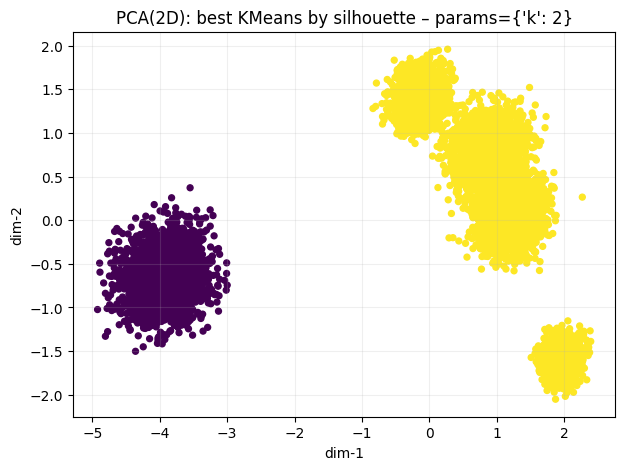

<Figure size 640x480 with 0 Axes>

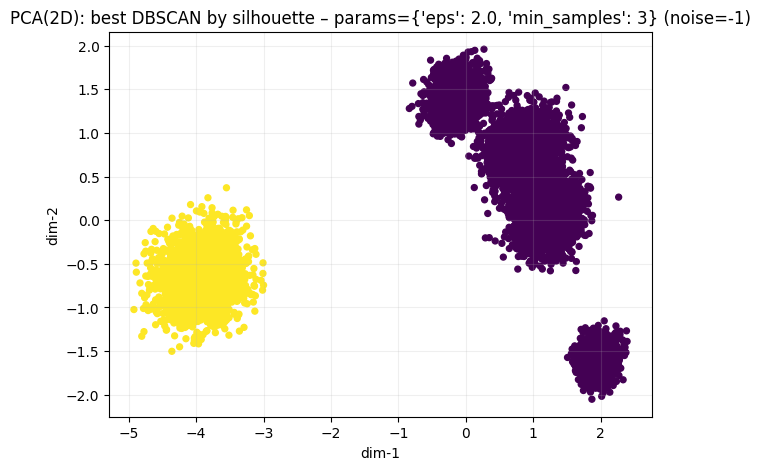

<Figure size 640x480 with 0 Axes>

In [39]:

X_plot2d = pca_2d_for_plot(X1, random_state=RANDOM_STATE)

# KMeans best
plot_2d_embedding(
    X_plot2d, best_kmeans1["labels"],
    title=f"PCA(2D): best KMeans by silhouette – params={best_kmeans1['params']}"
)
filename = 'dataset1_pca_kmeans.png'
plt.savefig(f'artifacts/figures/{filename}', 
            dpi=100, bbox_inches='tight')
# DBSCAN best (if exists)
if best_dbscan1 is not None:
    plot_2d_embedding(
        X_plot2d, best_dbscan1["labels"],
        title=f"PCA(2D): best DBSCAN by silhouette – params={best_dbscan1['params']} (noise=-1)"
    )
    filename = 'dataset1_pca_dbscan.png'
    plt.savefig(f'artifacts/figures/{filename}', 
                dpi=100, bbox_inches='tight')

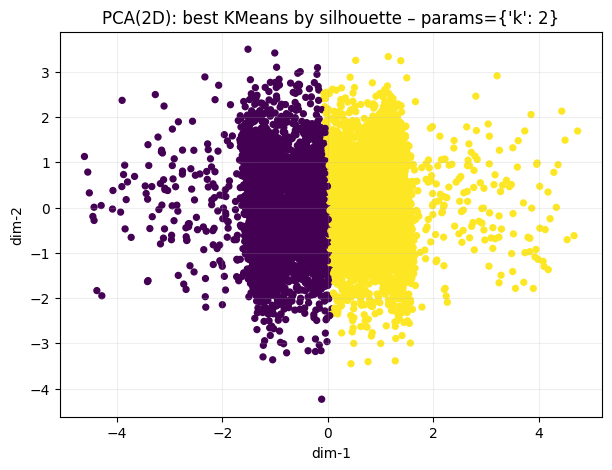

<Figure size 640x480 with 0 Axes>

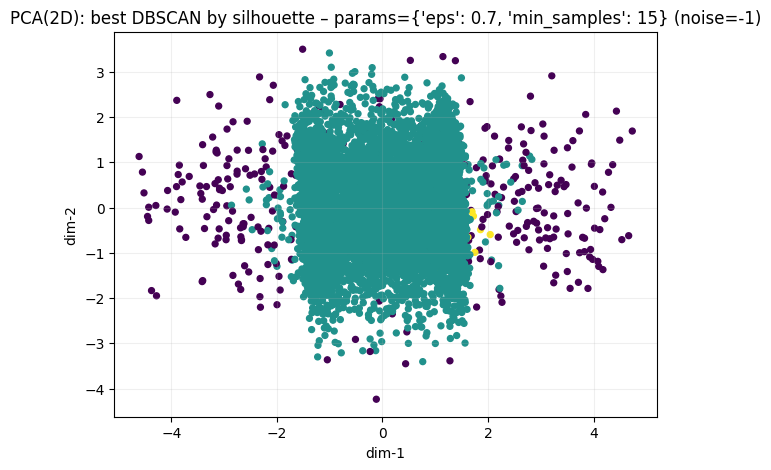

<Figure size 640x480 with 0 Axes>

In [40]:

X_plot2d = pca_2d_for_plot(X2, random_state=RANDOM_STATE)

# KMeans best
plot_2d_embedding(
    X_plot2d, best_kmeans2["labels"],
    title=f"PCA(2D): best KMeans by silhouette – params={best_kmeans2['params']}"
)
filename = 'dataset2_pca_kmeans.png'
plt.savefig(f'artifacts/figures/{filename}', 
            dpi=100, bbox_inches='tight')
# DBSCAN best (if exists)
if best_dbscan2 is not None:
    plot_2d_embedding(
        X_plot2d, best_dbscan2["labels"],
        title=f"PCA(2D): best DBSCAN by silhouette – params={best_dbscan2['params']} (noise=-1)"
    )
    filename = 'dataset2_pca_dbscan.png'
    plt.savefig(f'artifacts/figures/{filename}', 
                dpi=100, bbox_inches='tight')

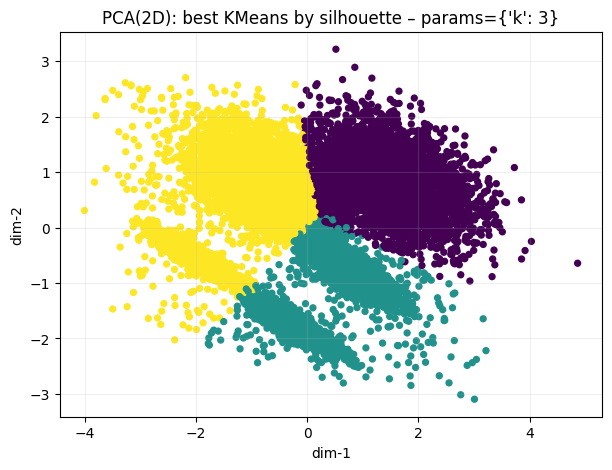

<Figure size 640x480 with 0 Axes>

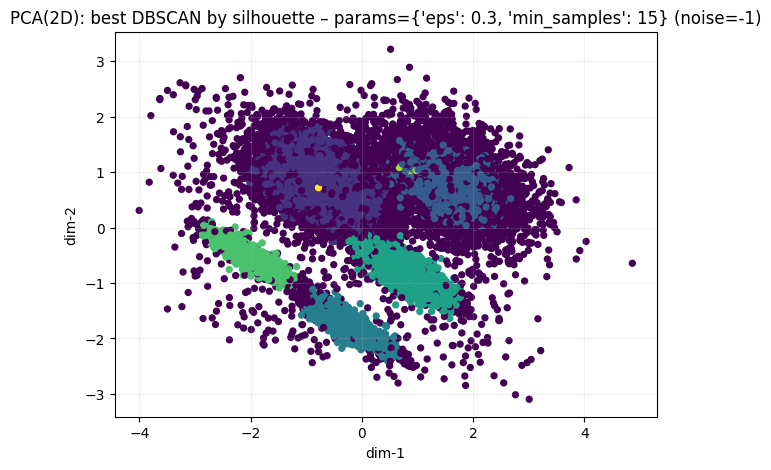

<Figure size 640x480 with 0 Axes>

In [41]:
X_plot2d = pca_2d_for_plot(X3, random_state=RANDOM_STATE)

# KMeans best
plot_2d_embedding(
    X_plot2d, best_kmeans3["labels"],
    title=f"PCA(2D): best KMeans by silhouette – params={best_kmeans3['params']}"
)
filename = 'dataset3_pca_kmeans.png'
plt.savefig(f'artifacts/figures/{filename}', 
            dpi=100, bbox_inches='tight')
# DBSCAN best (if exists)
if best_dbscan3 is not None:
    plot_2d_embedding(
        X_plot2d, best_dbscan3["labels"],
        title=f"PCA(2D): best DBSCAN by silhouette – params={best_dbscan3['params']} (noise=-1)"
    )
    filename = 'dataset3_pca_dbscan.png'
    plt.savefig(f'artifacts/figures/{filename}', 
                dpi=100, bbox_inches='tight')

In [46]:
import json

# Сохраняем метрики
metrics_summary = {}
best_configs = {}

# Для каждого датасета сохраняем лучшие результаты
datasets = [
    ('ds1', best_kmeans1, best_dbscan1, sample_id1),
    ('ds2', best_kmeans2, best_dbscan2, sample_id2),
    ('ds3', best_kmeans3, best_dbscan3, sample_id3)
]

for ds_name, kmeans_best, dbscan_best, sample_ids in datasets:
    metrics_summary[ds_name] = {}
    best_configs[ds_name] = {}
    
    # KMeans метрики
    metrics_summary[ds_name]['kmeans'] = {
        'silhouette': float(kmeans_best['metrics']['silhouette']),
        'davies_bouldin': float(kmeans_best['metrics']['davies_bouldin']),
        'calinski_harabasz': float(kmeans_best['metrics']['calinski_harabasz']),
        'noise_fraction': 0.0,
        'n_clusters': int(kmeans_best['n_clusters']),  # Добавляем количество кластеров
        'algorithm': 'KMeans'
    }
    best_configs[ds_name]['kmeans'] = {
        'params': kmeans_best['params'],
        'selection_criterion': 'max_silhouette_score',
        'metrics': {
            'silhouette': float(kmeans_best['metrics']['silhouette']),
            'davies_bouldin': float(kmeans_best['metrics']['davies_bouldin']),
            'calinski_harabasz': float(kmeans_best['metrics']['calinski_harabasz'])
        }
    }
    
    # DBSCAN метрики (только если dbscan_best существует)
    if dbscan_best and dbscan_best['metrics'] is not None:
        noise_frac = float(dbscan_best.get('noise_frac', 0.0))
        metrics_summary[ds_name]['dbscan'] = {
            'silhouette': float(dbscan_best['metrics']['silhouette']),
            'davies_bouldin': float(dbscan_best['metrics']['davies_bouldin']),
            'calinski_harabasz': float(dbscan_best['metrics']['calinski_harabasz']),
            'noise_fraction': noise_frac,
            'n_clusters': int(dbscan_best.get('n_clusters', 0)),  # Количество кластеров без шума
            'algorithm': 'DBSCAN'
        }
        best_configs[ds_name]['dbscan'] = {
            'params': dbscan_best['params'],
            'selection_criterion': 'max_silhouette_score',
            'metrics': {
                'silhouette': float(dbscan_best['metrics']['silhouette']),
                'davies_bouldin': float(dbscan_best['metrics']['davies_bouldin']),
                'calinski_harabasz': float(dbscan_best['metrics']['calinski_harabasz']),
                'noise_fraction': noise_frac
            }
        }
    
    # Определяем лучший алгоритм
    best_algorithm = 'kmeans'
    best_labels = kmeans_best['labels']
    best_params = kmeans_best['params']
    
    if (dbscan_best and dbscan_best['metrics'] is not None and 
        dbscan_best['metrics']['silhouette'] > kmeans_best['metrics']['silhouette']):
        best_algorithm = 'dbscan'
        best_labels = dbscan_best['labels']
        best_params = dbscan_best['params']
    
    # Сохраняем информацию о лучшем алгоритме
    best_configs[ds_name]['best_overall'] = {
        'algorithm': best_algorithm,
        'params': best_params,
        'silhouette': metrics_summary[ds_name][best_algorithm]['silhouette'],
        'n_clusters': metrics_summary[ds_name][best_algorithm]['n_clusters']
    }
    
    # Сохраняем labels лучшего алгоритма
    labels_df = pd.DataFrame({
        'sample_id': sample_ids,
        'cluster_label': best_labels
    })
    
    # Сортируем по sample_id для удобства
    labels_df = labels_df.sort_values('sample_id')
    
    # Сохраняем CSV
    csv_filename = f'artifacts/labels/labels_hw07_{ds_name}.csv'
    labels_df.to_csv(csv_filename, index=False)
    
    print(f"Saved labels for {ds_name}: {csv_filename}")
    print(f"  Best algorithm: {best_algorithm}, silhouette: {best_configs[ds_name]['best_overall']['silhouette']:.3f}")

# Сохраняем JSON файлы
with open('artifacts/metrics_summary.json', 'w') as f:
    json.dump(metrics_summary, f, indent=2, ensure_ascii=False)

with open('artifacts/best_configs.json', 'w') as f:
    json.dump(best_configs, f, indent=2, ensure_ascii=False)

print("\nJSON files saved:")
print("  - artifacts/metrics_summary.json")
print("  - artifacts/best_configs.json")

Saved labels for ds1: artifacts/labels/labels_hw07_ds1.csv
  Best algorithm: kmeans, silhouette: 0.522
Saved labels for ds2: artifacts/labels/labels_hw07_ds2.csv
  Best algorithm: dbscan, silhouette: 0.349
Saved labels for ds3: artifacts/labels/labels_hw07_ds3.csv
  Best algorithm: kmeans, silhouette: 0.316

JSON files saved:
  - artifacts/metrics_summary.json
  - artifacts/best_configs.json


Проверка устойчивости


Датасет: Dataset 1
Количество кластеров (k): 2
Количество точек: 12000
Количество признаков: 8
Проверка устойчивости KMeans с k=2
Запуск 1 с random_state=42:
  Инерция: 48425.91
  Количество точек в кластерах: [   0 2400 9600]
Запуск 2 с random_state=123:
  Инерция: 48425.91
  Количество точек в кластерах: [   0 9600 2400]
Запуск 3 с random_state=456:
  Инерция: 48425.91
  Количество точек в кластерах: [   0 2400 9600]
Запуск 4 с random_state=789:
  Инерция: 48425.91
  Количество точек в кластерах: [   0 9600 2400]
Запуск 5 с random_state=2025:
  Инерция: 48425.91
  Количество точек в кластерах: [   0 9600 2400]
Сравнение разбиений (Adjusted Rand Index):
  Запуск 1 vs Запуск 2: ARI = 1.0000
  Запуск 1 vs Запуск 3: ARI = 1.0000
  Запуск 1 vs Запуск 4: ARI = 1.0000
  Запуск 1 vs Запуск 5: ARI = 1.0000
  Запуск 2 vs Запуск 3: ARI = 1.0000
  Запуск 2 vs Запуск 4: ARI = 1.0000
  Запуск 2 vs Запуск 5: ARI = 1.0000
  Запуск 3 vs Запуск 4: ARI = 1.0000
  Запуск 3 vs Запуск 5: ARI = 1.0000
  З

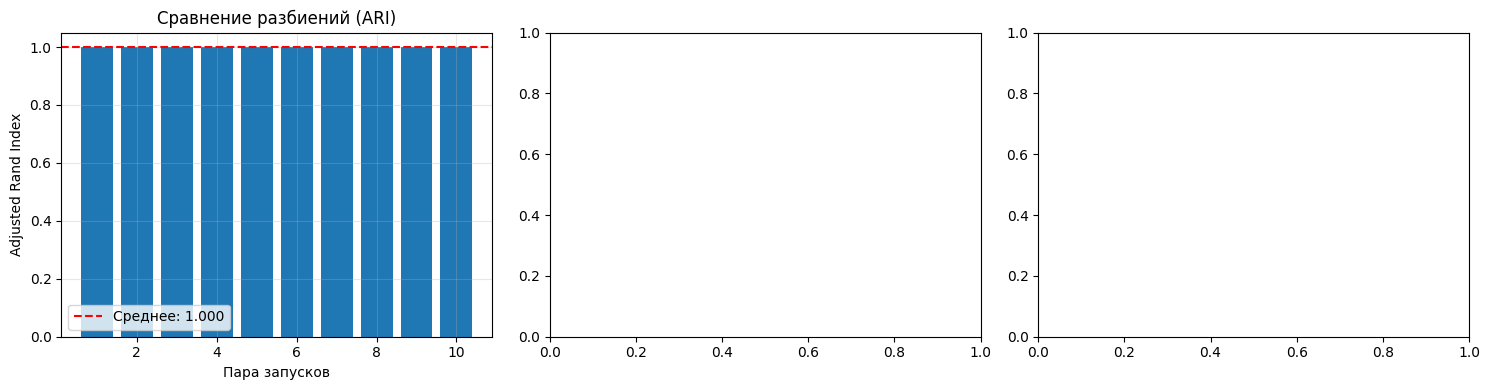

In [53]:
from sklearn.metrics import adjusted_rand_score

def check_kmeans_stability(X, k, n_runs=5, random_states=None):
    
    if random_states is None:
        random_states = [42, 123, 456, 789, 999]
    
    all_labels = []
    inertias = []
    
    print(f"Проверка устойчивости KMeans с k={k}")
    
    for i, rs in enumerate(random_states[:n_runs]):
        # Создаем и обучаем модель
        try:
            kmeans = KMeans(n_clusters=k, random_state=rs, n_init='auto')
        except TypeError:
            kmeans = KMeans(n_clusters=k, random_state=rs, n_init=10)
        
        labels = kmeans.fit_predict(X)
        all_labels.append(labels)
        inertias.append(kmeans.inertia_)
        
        print(f"Запуск {i+1} с random_state={rs}:")
        print(f"  Инерция: {kmeans.inertia_:.2f}")
        print(f"  Количество точек в кластерах: {np.bincount(labels + 1)}")
    
    # Вычисляем попарные ARI scores
    ari_scores = []
    print("Сравнение разбиений (Adjusted Rand Index):")
    
    for i in range(len(all_labels)):
        for j in range(i+1, len(all_labels)):
            ari = adjusted_rand_score(all_labels[i], all_labels[j])
            ari_scores.append(ari)
            print(f"  Запуск {i+1} vs Запуск {j+1}: ARI = {ari:.4f}")
    
    # Анализ схожести кластеров по размерам
    cluster_sizes = []
    for labels in all_labels:
        unique, counts = np.unique(labels, return_counts=True)
        cluster_sizes.append(counts)
    
    # Вычисляем статистики
    mean_ari = np.mean(ari_scores)
    std_ari = np.std(ari_scores)
    mean_inertia = np.mean(inertias)
    std_inertia = np.std(inertias)
    

    print(f"Средний ARI между запусками: {mean_ari:.4f}")
    print(f"Стандартное отклонение ARI: {std_ari:.4f}")
    print(f"Средняя инерция: {mean_inertia:.2f}")
    print(f"Стандартное отклонение инерции: {std_inertia:.2f}")
    
    # Оценка устойчивости
    if mean_ari > 0.9:
        stability = "ОЧЕНЬ ВЫСОКАЯ"
        explanation = "Все запуски дали практически одинаковые разбиения"
    elif mean_ari > 0.7:
        stability = "ВЫСОКАЯ"
        explanation = "Разбиения очень похожи, небольшие различия"
    elif mean_ari > 0.5:
        stability = "СРЕДНЯЯ"
        explanation = "Разбиения имеют заметные различия"
    else:
        stability = "НИЗКАЯ"
        explanation = "Разбиения сильно отличаются друг от друга"
    
    print(f"\nОЦЕНКА УСТОЙЧИВОСТИ: {stability}")
    print(f"Обоснование: {explanation}")
    print(f"  ARI близок к 1 означает идентичные разбиения")
    print(f"  ARI близок к 0 означает случайные разбиения")
    
    # Визуализация
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # 1. График ARI scores
    axes[0].bar(range(1, len(ari_scores)+1), ari_scores)
    axes[0].axhline(y=mean_ari, color='r', linestyle='--', label=f'Среднее: {mean_ari:.3f}')
    axes[0].set_xlabel('Пара запусков')
    axes[0].set_ylabel('Adjusted Rand Index')
    axes[0].set_title('Сравнение разбиений (ARI)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Возвращаем результаты
    results = {
        'all_labels': all_labels,
        'ari_scores': ari_scores,
        'inertias': inertias,
        'mean_ari': float(mean_ari),
        'std_ari': float(std_ari),
        'mean_inertia': float(mean_inertia),
        'std_inertia': float(std_inertia),
        'stability_assessment': stability,
        'explanation': explanation,
        'random_states_used': random_states[:n_runs]
    }
    
    return results

# Выбираем датасет для проверки устойчивости (например, первый)
X_stability = X1
best_k = best_kmeans1['params']['k']
dataset_name = "Dataset 1"

print(f"\nДатасет: {dataset_name}")
print(f"Количество кластеров (k): {best_k}")
print(f"Количество точек: {X_stability.shape[0]}")
print(f"Количество признаков: {X_stability.shape[1]}")

# Выполняем проверку
stability_results = check_kmeans_stability(
    X=X_stability,
    k=best_k,
    n_runs=5,
    random_states=[42, 123, 456, 789, 2025]
)

In [ ]:

print("АНАЛИЗ СРЕДНИХ ЗНАЧЕНИЙ ПРИЗНАКОВ ПО КЛАСТЕРАМ")

# Для Dataset 1
print("\nDATASET 1:")
labels_ds1 = best_kmeans1["labels"]
cluster_ids = np.unique(labels_ds1)

for cluster_id in cluster_ids:
    mask = labels_ds1 == cluster_id
    cluster_data = X1[mask]
    print(f"\nКластер {cluster_id}: {mask.sum()} точек ({mask.sum()/len(X1):.1%})")
    print("Средние значения признаков:")
    for i in range(min(5, X1.shape[1])):  # Показываем первые 5 признаков
        mean_val = cluster_data[:, i].mean()
        std_val = cluster_data[:, i].std()
        print(f"  f{i+1:02d}: {mean_val:7.3f} ± {std_val:.3f}")

# Для Dataset 2
print("\n" + "="*70)
print("\nDATASET 2:")
labels_ds2 = best_kmeans2["labels"]

for cluster_id in np.unique(labels_ds2):
    mask = labels_ds2 == cluster_id
    cluster_data = X2[mask]
    print(f"\nКластер {cluster_id}: {mask.sum()} точек ({mask.sum()/len(X2):.1%})")
    print("Средние значения признаков:")
    feature_names = ['x1', 'x2', 'z_noise']
    for i, feat_name in enumerate(feature_names):
        mean_val = cluster_data[:, i].mean()
        std_val = cluster_data[:, i].std()
        print(f"  {feat_name}: {mean_val:7.3f} ± {std_val:.3f}")

# Для Dataset 3
print("\n" + "="*70)
print("\nDATASET 3:")
labels_ds3 = best_kmeans3["labels"]

for cluster_id in np.unique(labels_ds3):
    mask = labels_ds3 == cluster_id
    cluster_data = X3[mask]
    print(f"\nКластер {cluster_id}: {mask.sum()} точек ({mask.sum()/len(X3):.1%})")
    print("Средние значения признаков:")
    feature_names = ['x1', 'x2', 'f_corr', 'f_noise']
    for i, feat_name in enumerate(feature_names):
        mean_val = cluster_data[:, i].mean()
        std_val = cluster_data[:, i].std()
        print(f"  {feat_name}: {mean_val:7.3f} ± {std_val:.3f}")


АНАЛИЗ СРЕДНИХ ЗНАЧЕНИЙ ПРИЗНАКОВ ПО КЛАСТЕРАМ

DATASET 1:

Кластер 0: 2400 точек (20.0%)
Средние значения признаков:
  f01:   1.813 ± 0.184
  f02:   0.674 ± 0.246
  f03:  -1.946 ± 0.219
  f04:  -1.593 ± 0.129
  f05:   1.461 ± 0.151

Кластер 1: 9600 точек (80.0%)
Средние значения признаков:
  f01:  -0.453 ± 0.463
  f02:  -0.169 ± 1.045
  f03:   0.487 ± 0.233
  f04:   0.398 ± 0.673
  f05:  -0.365 ± 0.760


DATASET 2:

Кластер 0: 4017 точек (50.2%)
Средние значения признаков:
  x1:   0.684 ± 0.722
  x2:  -0.671 ± 0.734
  z_noise:   0.014 ± 1.003

Кластер 1: 3983 точек (49.8%)
Средние значения признаков:
  x1:  -0.690 ± 0.732
  x2:   0.677 ± 0.743
  z_noise:  -0.015 ± 0.997


DATASET 3:

Кластер 0: 3681 точек (24.5%)
Средние значения признаков:
  x1:   1.165 ± 0.556
  x2:   1.030 ± 0.461
  f_corr:   0.625 ± 0.678
  f_noise:  -0.018 ± 0.988

Кластер 1: 4903 точек (32.7%)
Средние значения признаков:
  x1:   0.297 ± 0.474
  x2:  -0.980 ± 0.545
  f_corr:   0.735 ± 0.569
  f_noise:   0.008 ± 